In [1]:
# importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay

In [2]:
# using pandas reading csv file and store it in a dataframe

path = r"C:\Users\nvish\Downloads\Credit score classification prediction.csv"

df = pd.read_csv(path)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.shape

(100000, 28)

In [4]:
# Details of columns in the data

df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Exploratory Data Analysis and Visualization

In [5]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# Checking for duplicate values

df.duplicated().sum()

0

In [7]:
# statistical description of data

df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,100000.0,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.0,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.0,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Delay_from_due_date,100000.0,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_Credit_Inquiries,98035.0,27.75,193.18,0.00,3.00,6.00,9.00,2597.00
Credit_Utilization_Ratio,100000.0,32.29,5.12,20.00,28.05,32.31,36.50,50.00
Total_EMI_per_month,100000.0,1403.12,8306.04,0.00,30.31,69.25,161.22,82331.00


In [8]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Cleaning data

In [9]:
def clean_age(age):
    try:
        return int(age)
    except ValueError:
        return None

df['Age'] = df['Age'].str.replace('_', '').str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)

In [10]:
def truncate_last_two_digits(age):
    if age > 99:
        return age // 100
    else:
        return age


df['Age'] = df['Age'].apply(truncate_last_two_digits)
df.Age

0        23
1        23
2         5
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

In [11]:
Customer_Mode_Salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.mode().iloc[0])
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'].isnull(), Customer_Mode_Salary, df['Monthly_Inhand_Salary'])

In [12]:
def fill_occupation_by_ssn(df):
    # Replace '_______' values ​​in 'Occupation' column with NaN (empty) values
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)
    
    # Find the most recurring 'Occupation' values ​​for each SNN number
    most_common_occupation_by_ssn = df.groupby('SSN')['Occupation'].apply(lambda x: x.mode().iloc[0])
    
    # 'Populating '_______' values ​​in 'Occupation' column
    for index, row in df.iterrows():
        if pd.isnull(row['Occupation']) and row['SSN'] in most_common_occupation_by_ssn:
            df.at[index, 'Occupation'] = most_common_occupation_by_ssn[row['SSN']]
fill_occupation_by_ssn(df)

In [13]:
df['Occupation'].value_counts()

Occupation
Lawyer           7489
Engineer         6837
Architect        6806
Mechanic         6752
Accountant       6717
Scientist        6713
Media_Manager    6689
Developer        6687
Teacher          6646
Entrepreneur     6621
Doctor           6537
Journalist       6502
Manager          6402
Musician         6322
Writer           6280
Name: count, dtype: int64

In [14]:
def clean_annual_income(income):
    try:
        return float(income)
    except ValueError:
        return None

df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').str.replace('-', '')
df['Annual_Income'] = df['Annual_Income'].apply(clean_annual_income)

In [15]:
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [16]:
# Function to remove "-" and "_" characters
def clean_num(num):
    num = num.strip("-_")  
    if num == "100":  
        return np.nan
    elif len(num) > 1:  
        return num[0]
    else:
        return num


df["Num_of_Loan"] = df["Num_of_Loan"].apply(clean_num)


most_common_value = df["Num_of_Loan"].mode()[0]
df["Num_of_Loan"] = df["Num_of_Loan"].fillna(most_common_value)

In [17]:
df.Num_of_Loan.value_counts()

Num_of_Loan
3    19016
2    15076
4    14776
0    10930
1    10800
6     7839
7     7368
5     7231
9     3736
8     3228
Name: count, dtype: int64

In [18]:
df['Type_of_Loan'].fillna('Unknown', inplace=True)

In [19]:
loan_type_groups = df.groupby('Type_of_Loan').size()
print(loan_type_groups)

Type_of_Loan
Auto Loan                                                                                                                                    1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                          8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                      8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan        8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                                8
                                                                                                                                            ...  
Student Loan, and Not Specified                                                                                

In [20]:
df.Type_of_Loan.value_counts()

Type_of_Loan
Unknown                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [21]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0')

In [22]:
def remove_special_characters(value):
    if isinstance(value, str):
       
        value = value.strip('_').strip('-')
    return value

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(
    remove_special_characters)

In [23]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)


df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')


mean_value = df['Changed_Credit_Limit'].mean()


df['Changed_Credit_Limit'].fillna(mean_value, inplace=True)

In [24]:
df['Num_Credit_Inquiries'].fillna(0, inplace=True)

In [25]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

def fill_na_cat(data, val):
  
    for col in data.select_dtypes(include='object').columns:
        mode_by_customer = data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        mode_global = data[col].mode()[0]
        data[col] = data[col].fillna(mode_by_customer.fillna(mode_global))
    return data

df = fill_na_cat(data=df, val="Credit_Mix")

In [26]:
# Covert Credit_History_Age to month
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)

In [27]:
df.drop(columns=['Credit_History_Age'], inplace=True)

In [28]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(
    '__10000__', np.nan)

df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [29]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
239.59620527100063                  6
212.44492522535438                  5
128.54140433011784                  5
244.99107777431962                  5
                                   ..
658.9412372133265                   1
1072.867912409617                   1
740.0418087099729                   1
1279.6106996658787                  1
393.6736955618808                   1
Name: count, Length: 98792, dtype: int64

In [30]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')

In [31]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

mean_value = df['Monthly_Balance'].mean()

df['Monthly_Balance'].fillna(mean_value, inplace=True)

In [32]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
3.333333e+26    9
2.395962e+02    6
2.124449e+02    5
1.285414e+02    5
2.449911e+02    5
               ..
6.589412e+02    1
1.072868e+03    1
7.400418e+02    1
1.279611e+03    1
3.936737e+02    1
Name: count, Length: 98792, dtype: int64

In [33]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [34]:
df['Payment_Behaviour'].isna().sum()

7600

In [35]:
# Group data by 'Payment Behaviour' column
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     13721
High_spent_Medium_value_payments    17540
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Low_spent_Medium_value_payments     13861
Low_spent_Small_value_payments      25513
dtype: int64


In [36]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(method='ffill')

In [37]:
df['Payment_Behaviour'].isna().sum()

0

In [38]:
df['Interest_Rate'] = df['Interest_Rate'].astype(float)

In [39]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(str)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].str.replace('-', '')
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)

In [40]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(str)
df['Delay_from_due_date'] = df['Delay_from_due_date'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(int)

In [41]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)

In [42]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1109.03    24
1151.7     24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

In [43]:
df = df[['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age_Months','Payment_of_Min_Amount', 'Total_EMI_per_month','Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance','Credit_Score']]
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,118.28022162236736,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,265,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,5,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,118.28022162236736,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,118.28022162236736,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,118.28022162236736,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,140.58140274528395,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,140.58140274528395,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,140.58140274528395,Low_spent_Large_value_payments,319.164979,Standard


In [44]:
# removing unwanted columns

df.drop(columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan'],inplace=True)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3.0,4,3,7,...,Good,809.98,26.822620,265,No,49.574949,118.28022162236736,High_spent_Small_value_payments,312.494089,Good
1,23,Scientist,19114.12,1824.843333,3,4,3.0,4,1,0,...,Good,809.98,31.944960,265,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,Good
2,5,Scientist,19114.12,1824.843333,3,4,3.0,4,3,7,...,Good,809.98,28.609352,267,No,49.574949,118.28022162236736,Low_spent_Medium_value_payments,331.209863,Good
3,23,Scientist,19114.12,1824.843333,3,4,3.0,4,5,4,...,Good,809.98,31.377862,268,No,49.574949,118.28022162236736,Low_spent_Small_value_payments,223.451310,Good
4,23,Scientist,19114.12,1824.843333,3,4,3.0,4,6,0,...,Good,809.98,24.797347,269,No,49.574949,118.28022162236736,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7.0,2,23,7,...,Good,502.38,34.663572,378,No,35.104023,140.58140274528395,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7.0,2,18,7,...,Good,502.38,40.565631,379,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,496.651610,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729.0,2,27,6,...,Good,502.38,41.255522,380,No,35.104023,140.58140274528395,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7.0,2,20,0,...,Good,502.38,33.638208,381,No,35.104023,140.58140274528395,Low_spent_Large_value_payments,319.164979,Standard


In [45]:
#checking for missing values

df.isna().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age_Months    0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

In [46]:
df.dtypes

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int32
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                   object
Delay_from_due_date            int32
Num_of_Delayed_Payment        object
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Credit_History_Age_Months      int64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
dtype: object

In [47]:
columns_to_convert = ['Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly','Num_of_Loan']
for col in columns_to_convert:
    df[col] = df[col].astype(float)

In [48]:
df.dtypes

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int32
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Delay_from_due_date            int32
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age_Months      int64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
dtype: object

In [49]:
file_path = 'data/Dataset-1_pre-processed_file.csv'
df.to_csv(file_path, index=False)

In [50]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

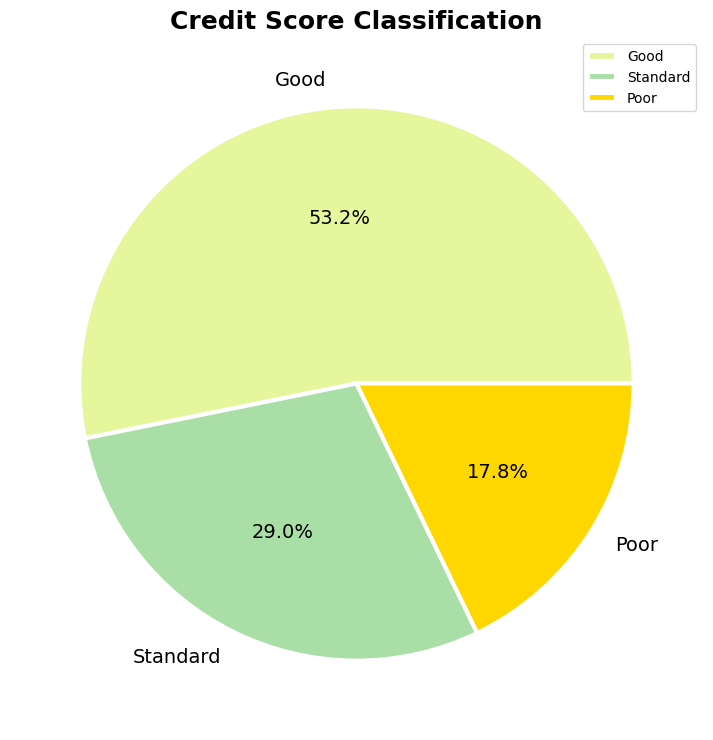

In [51]:
count = df['Credit_Score'].value_counts()
label=['Good','Standard','Poor']
colors = ['#E6F69D', '#AADEA7', '#FFD700']
plt.figure(figsize=(9,9))
plt.title("Credit Score Classification",fontsize=18,fontweight='bold')
plt.pie(count,autopct='%1.1f%%',labels=label,textprops={"fontsize":14},colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.legend(loc='upper right')
plt.show()

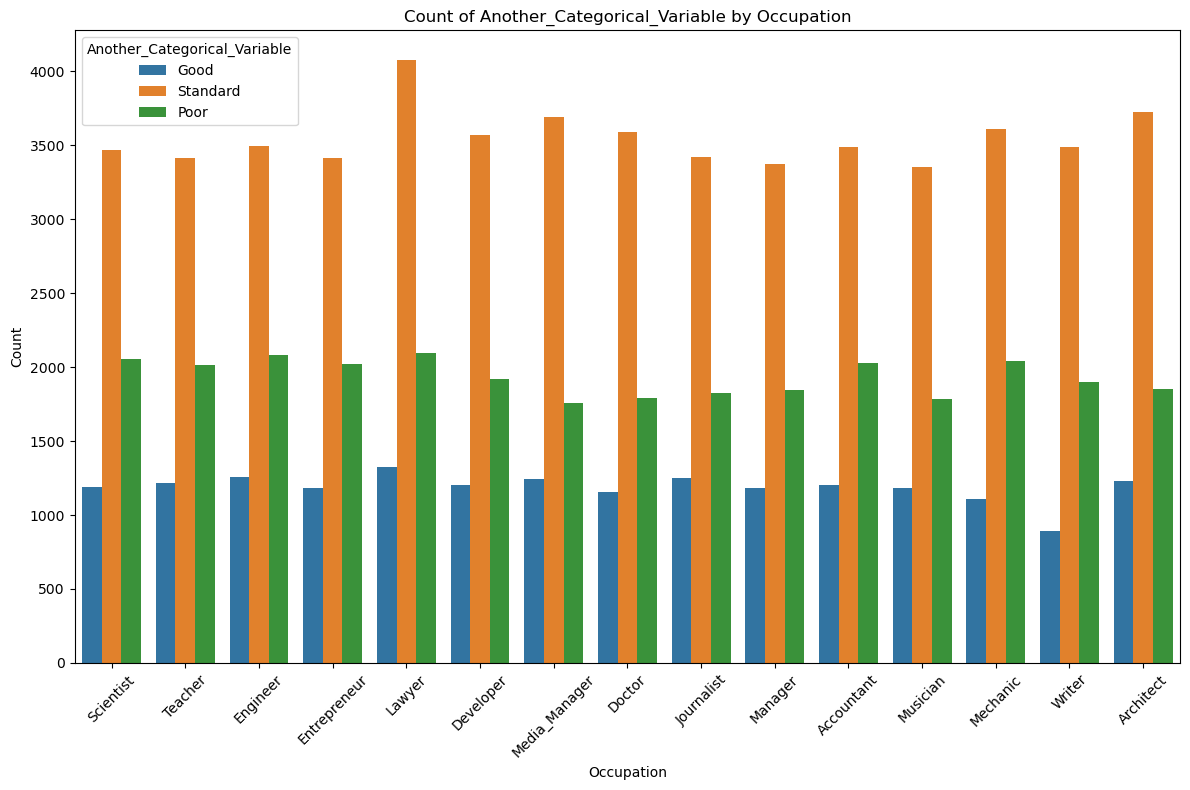

In [52]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.tight_layout()
plt.show()

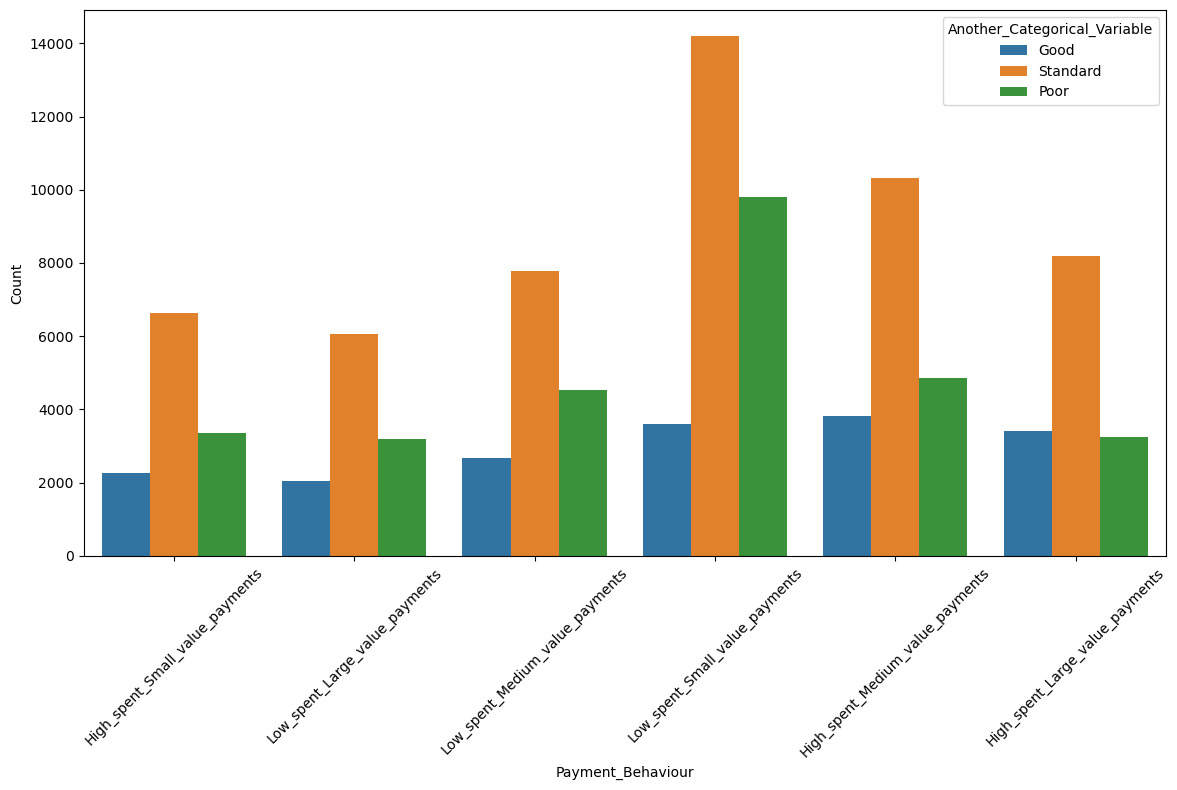

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.tight_layout()
plt.show()

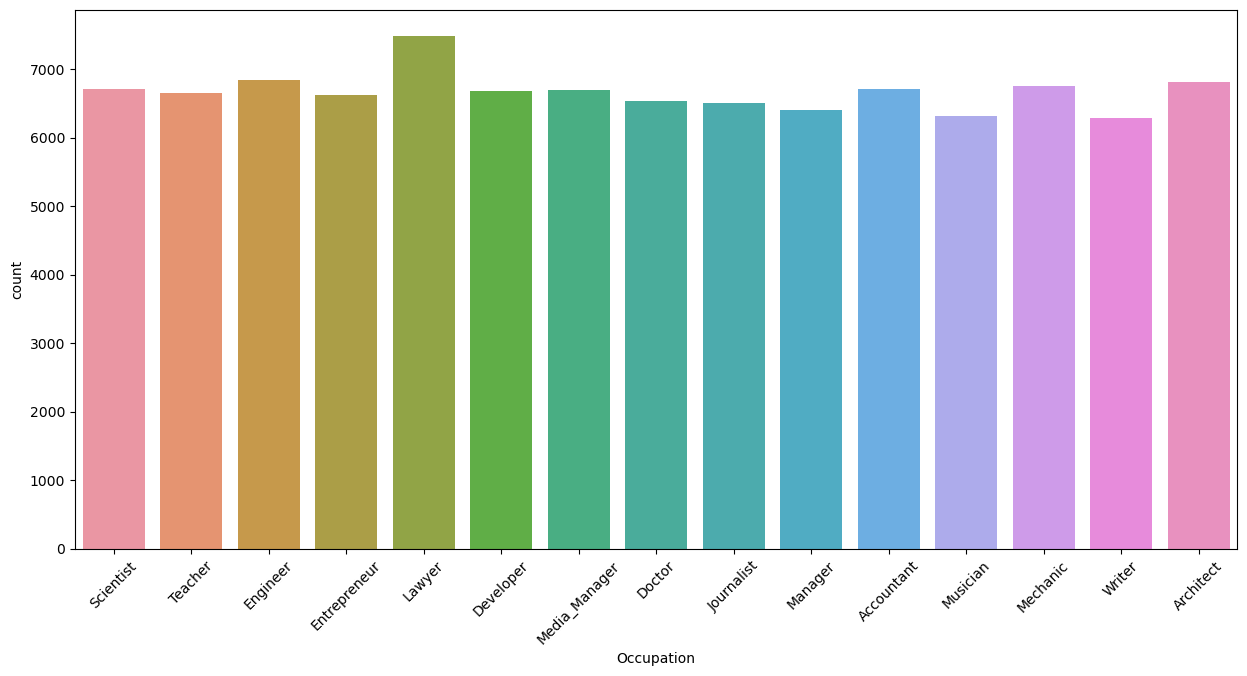

In [54]:
plt.figure(figsize=(15,7))
plot = sns.countplot(x = 'Occupation', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.show()

In [55]:
le = LabelEncoder()
cols=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
for j in cols:
  df[j]=le.fit_transform(df[j])
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,12,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,1,809.98,26.822620,265,1,49.574949,118.280222,2,312.494089,0
1,23,12,19114.12,1824.843333,3,4,3.0,4.0,1,0.0,...,1,809.98,31.944960,265,1,49.574949,118.280222,3,284.629162,0
2,5,12,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,1,809.98,28.609352,267,1,49.574949,118.280222,4,331.209863,0
3,23,12,19114.12,1824.843333,3,4,3.0,4.0,5,4.0,...,1,809.98,31.377862,268,1,49.574949,118.280222,5,223.451310,0
4,23,12,19114.12,1824.843333,3,4,3.0,4.0,6,0.0,...,1,809.98,24.797347,269,1,49.574949,118.280222,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,9,39628.99,3359.415833,4,6,7.0,2.0,23,7.0,...,1,502.38,34.663572,378,1,35.104023,140.581403,0,479.866228,1
99996,25,9,39628.99,3359.415833,4,6,7.0,2.0,18,7.0,...,1,502.38,40.565631,379,1,35.104023,140.581403,1,496.651610,1
99997,25,9,39628.99,3359.415833,4,6,5729.0,2.0,27,6.0,...,1,502.38,41.255522,380,1,35.104023,140.581403,0,516.809083,1
99998,25,9,39628.99,3359.415833,4,6,7.0,2.0,20,0.0,...,1,502.38,33.638208,381,1,35.104023,140.581403,3,319.164979,2


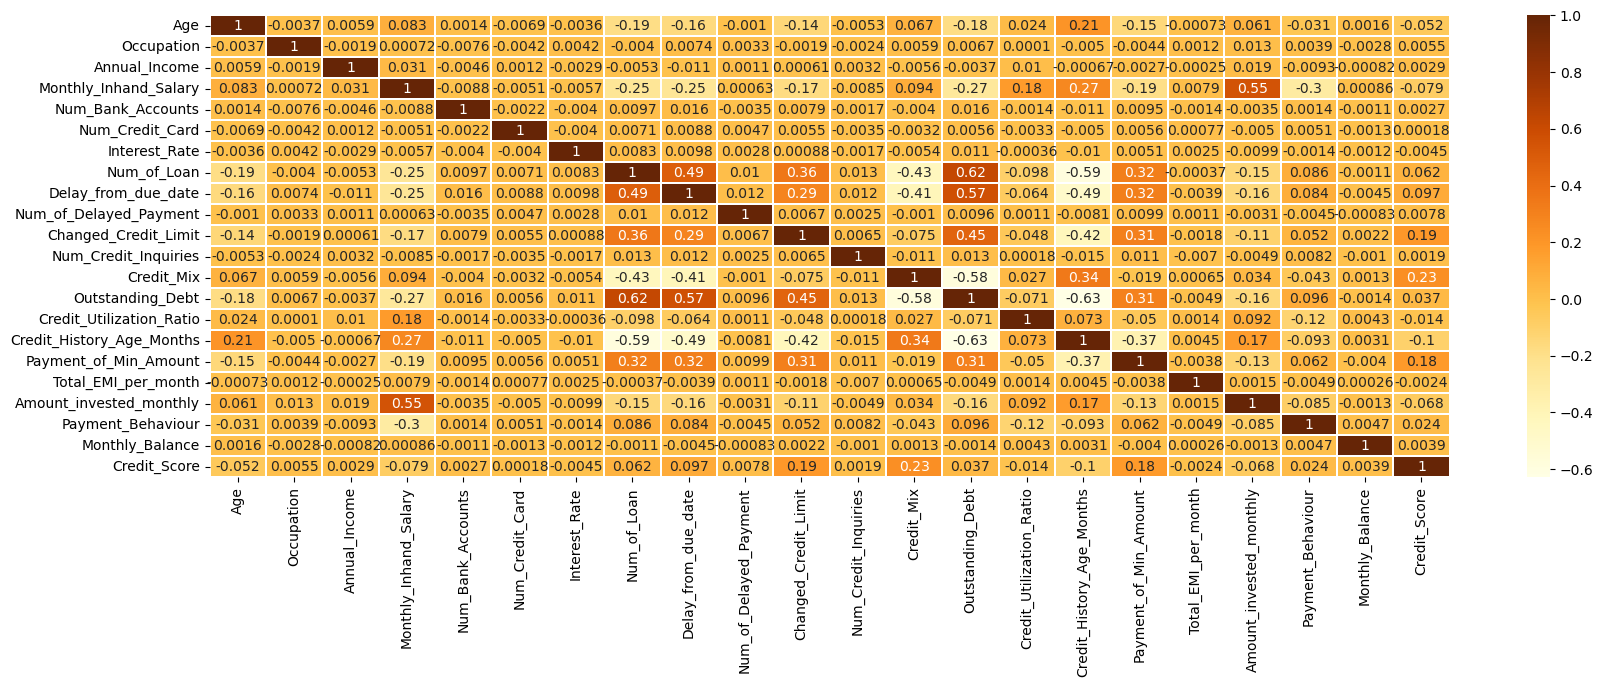

In [56]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,cmap="YlOrBr")
plt.show()

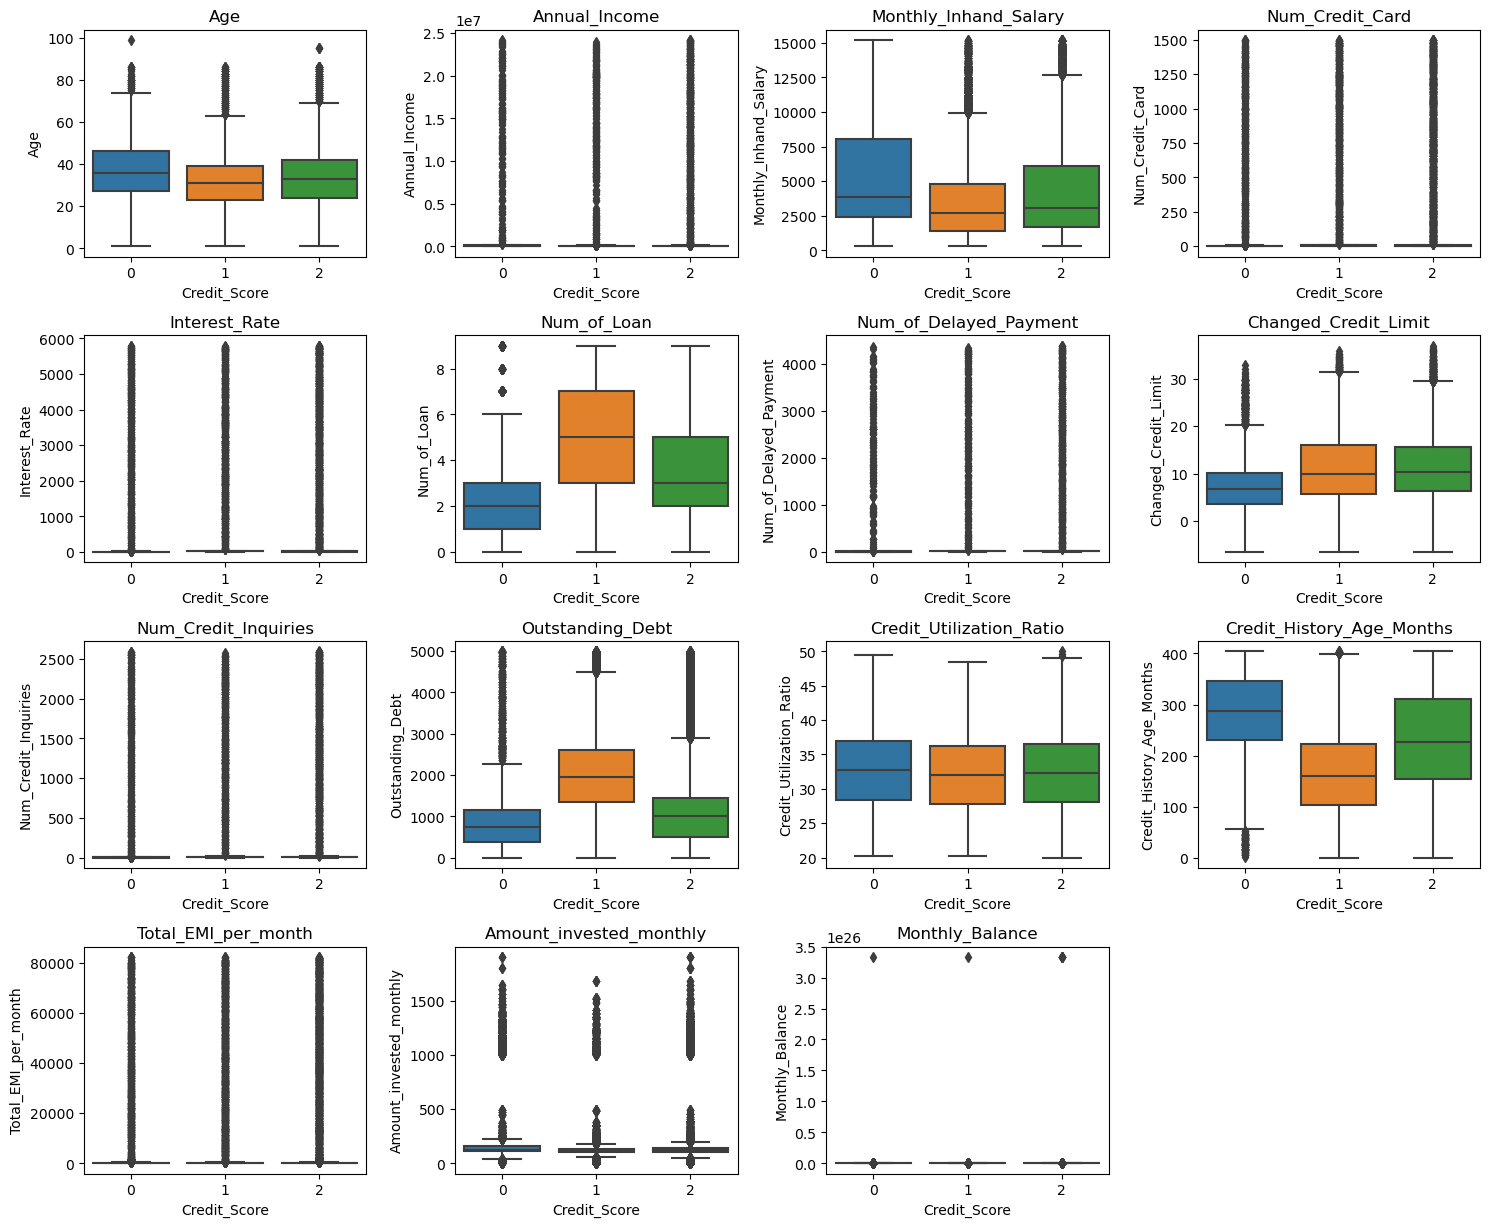

In [57]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [58]:
columns = ['Age','Monthly_Inhand_Salary','Num_Credit_Card','Amount_invested_monthly']

for col in columns:
    threshold = 1.5
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df_nooutliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [59]:
df_nooutliers.shape

(83512, 22)

In [60]:
x = df_nooutliers.drop(columns=['Credit_Score'])
x

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,12,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,4.0,1,809.98,26.822620,265,1,49.574949,118.280222,2,312.494089
1,23,12,19114.12,1824.843333,3,4,3.0,4.0,1,0.0,...,4.0,1,809.98,31.944960,265,1,49.574949,118.280222,3,284.629162
2,5,12,19114.12,1824.843333,3,4,3.0,4.0,3,7.0,...,4.0,1,809.98,28.609352,267,1,49.574949,118.280222,4,331.209863
3,23,12,19114.12,1824.843333,3,4,3.0,4.0,5,4.0,...,4.0,1,809.98,31.377862,268,1,49.574949,118.280222,5,223.451310
4,23,12,19114.12,1824.843333,3,4,3.0,4.0,6,0.0,...,4.0,1,809.98,24.797347,269,1,49.574949,118.280222,1,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,9,39628.99,3359.415833,4,6,7.0,2.0,23,7.0,...,3.0,1,502.38,34.663572,378,1,35.104023,140.581403,0,479.866228
99996,25,9,39628.99,3359.415833,4,6,7.0,2.0,18,7.0,...,3.0,1,502.38,40.565631,379,1,35.104023,140.581403,1,496.651610
99997,25,9,39628.99,3359.415833,4,6,5729.0,2.0,27,6.0,...,3.0,1,502.38,41.255522,380,1,35.104023,140.581403,0,516.809083
99998,25,9,39628.99,3359.415833,4,6,7.0,2.0,20,0.0,...,3.0,1,502.38,33.638208,381,1,35.104023,140.581403,3,319.164979


In [61]:
y = df_nooutliers['Credit_Score']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Score, Length: 83512, dtype: int32

In [62]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[2.24489796e-01, 8.57142857e-01, 5.00523415e-04, ...,
        4.57705929e-01, 4.00000000e-01, 9.37458987e-25],
       [2.24489796e-01, 8.57142857e-01, 5.00523415e-04, ...,
        4.57705929e-01, 6.00000000e-01, 8.53864208e-25],
       [4.08163265e-02, 8.57142857e-01, 5.00523415e-04, ...,
        4.57705929e-01, 8.00000000e-01, 9.93606310e-25],
       ...,
       [2.44897959e-01, 6.42857143e-01, 1.34855874e-03, ...,
        6.11415369e-01, 0.00000000e+00, 1.55040397e-24],
       [2.44897959e-01, 6.42857143e-01, 1.34855874e-03, ...,
        6.11415369e-01, 6.00000000e-01, 9.57471657e-25],
       [2.44897959e-01, 6.42857143e-01, 1.34855874e-03, ...,
        6.11415369e-01, 6.00000000e-01, 1.18099781e-24]])

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [64]:
dec=DecisionTreeClassifier(max_depth=25,random_state=1)
dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, random_state=1)

In [65]:
y_pred=dec.predict(X_test)

In [66]:
print("Accuracy_Score:",accuracy_score(y_pred,y_test))
print("\nF1_Score:",f1_score(y_pred,y_test,average='micro'))

Accuracy_Score: 0.7423565099385327

F1_Score: 0.7423565099385327



Classification Report:

               precision    recall  f1-score   support

           0       0.67      0.68      0.68      4276
           1       0.72      0.74      0.73      7122
           2       0.78      0.76      0.77     13656

    accuracy                           0.74     25054
   macro avg       0.72      0.73      0.73     25054
weighted avg       0.74      0.74      0.74     25054


Confusion Matrix Display:



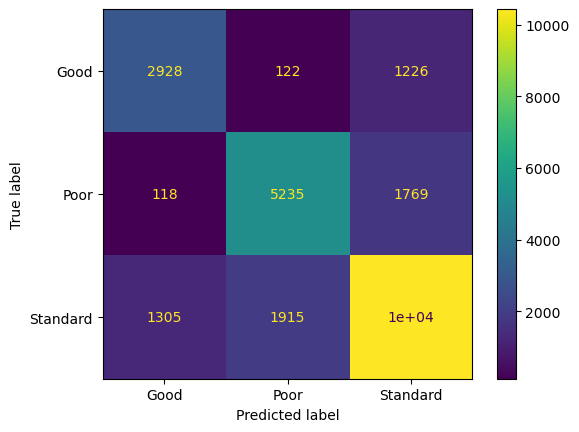

In [67]:
print("\nClassification Report:")
print("\n",classification_report(y_pred,y_test))
print("\nConfusion Matrix Display:")
print("\n",ConfusionMatrixDisplay.from_predictions(y_pred,y_test,display_labels=['Good','Poor','Standard']))